# 绘图和可视化

In [13]:
from pandas import Series, DataFrame, Index, MultiIndex
import pandas as pd
import numpy as np
import datetime
import random
import re

In [14]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt

## matplotlib API入门

### Figure 和 Subplot

matplotlib的图像都位于Figure对象中。

你可以通过plt.figure创建一个新的Figure，选项figszie用于确保图片保存到磁盘时具有一定的大小和纵横比。

Figure还支持一种MATLAB式的编号架构，如plt.figure(2) 通过plt.gcf()即可得到当前Figure的引用。

In [16]:
fig = plt.figure()

In [17]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

如果这个时候发出一条绘图命令，matplotlib就会在最后一个用过的subplot上进行绘制。（在notebook上好像没有生效，ipython上实际是生效的）

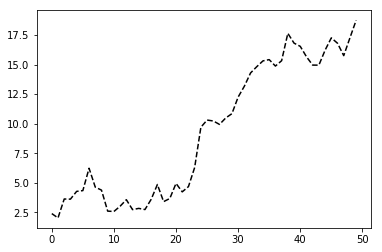

In [18]:
plt.plot(np.random.randn(50).cumsum(), "k--")

In [19]:
_ = ax1.hist(np.random.randn(100), bins=20, color="k", alpha=0.3)

In [20]:
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))

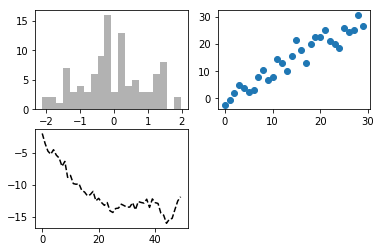

In [23]:
ax3.plot(np.random.randn(50).cumsum(), "k--")
fig  # 相当于ipython运行fig.show()

更方便的根据布局创建Figure和subplot，可以用plt.subplots

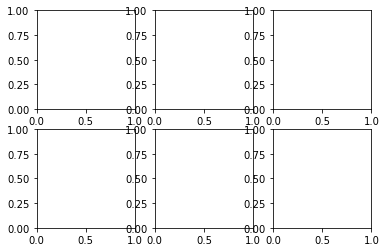

In [24]:
fig, axes = plt.subplots(2,3)

In [25]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000094E7710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009EA5860>]], dtype=object)

![subplots.png](./files/subplots.png)

### 调整subplot周围的间距
默认matplotlib会在subplot外围留下一定间距，并在subplot之间留下一定间距。

利用Figure的subplots_adjust方法可以轻松修改间距。 

此外它也是个顶级函数   wspace 和 hspace 用于控制宽度和高度的百分比
```python
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
```

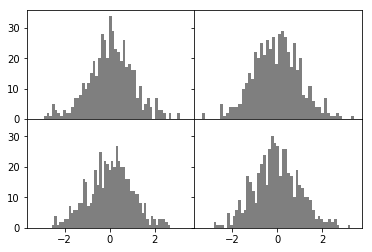

In [27]:
fig, axes = plt.subplots(2,2,sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color="k", alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 颜色、标记、线型

matplotlib的plot函数接受一组X合Y坐标，还可以接受一个表示颜色和线型的字符串缩写。

比如绘制绿色虚线
`ax.plot(x, y, 'g--')`

采用明确方式表示
`ax.plot(x, y, linestyle='--', color='g')`

线型图还可以加上标记，以强调实际数据点。标记可以放在格式字符串中，但标记类型和线型必须放在颜色后面。

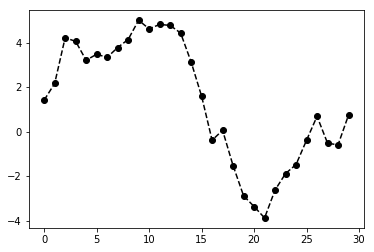

In [28]:
plt.plot(np.random.randn(30).cumsum(), "ko--")

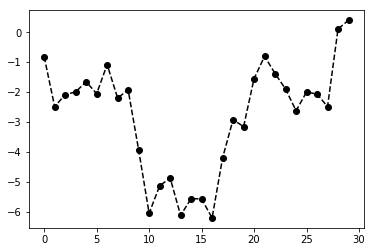

In [29]:
plt.plot(np.random.randn(30).cumsum(), color="k", linestyle="dashed", marker="o")  # 明确的方式

线型图中，非实际数据点默认按照线性方式插值的，可以通过drawstyle选项修改

In [30]:
data = np.random.randn(30).cumsum() 

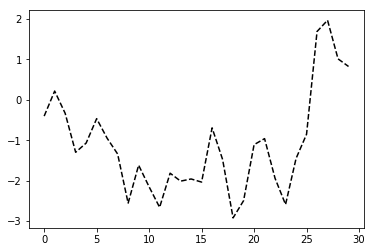

In [31]:
plt.plot(data, "k--", label="Default")

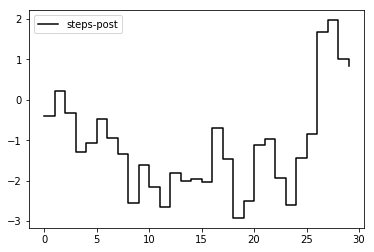

In [34]:
plt.plot(data, "k-", label="steps-post", drawstyle="steps-post")
plt.legend(loc="best")

### 刻度、标签和图例
